# Fake news detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## Read datasets

In [2]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [3]:
fake.shape

(23481, 4)

In [4]:
true.shape

(21417, 4)

## Data cleaning and preparation

In [5]:
# Add flag to track fake and real
fake['target'] = 0#'fake'
true['target'] = 1#'true'

In [6]:
# Concatenate dataframes
# Reset the index of the DataFrame, and use the default one instead. 
# If the DataFrame has a MultiIndex, this method can remove one or more levels.
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [7]:
data

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [8]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [9]:
# Check the data
data

,title,text,subject,date,target
0,Iraqi forces complete Kirkuk province takeover...,"BAGHDAD/ERBIL, Iraq (Reuters) - Iraqi forces o...",worldnews,"October 20, 2017",1
1,Exclusive: Trump calls Chinese 'grand champion...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"February 23, 2017",1
2,"Netanyahu Echos Trump, Wants Fence Around Isr...",Echoing statements made by Donald Trump about ...,News,"February 10, 2016",0
3,MAKE IT STOP! Daughter Of Sexual Predator And ...,Apparently being the daughter of the most corr...,left-news,"May 2, 2016",0
4,Bill Clinton delivers defense of his foundatio...,NEW YORK (Reuters) - Former U.S. President Bil...,politicsNews,"September 22, 2016",1
...,...,...,...,...,...
44893,UNREAL! OBAMA BLAMES SYRIAN CIVIL WAR ON CLIMA...,,Government News,"Oct 5, 2016",0
44894,Australian medical group wants access to Manus...,MELBOURNE (Reuters) - Australia s main medical...,worldnews,"November 18, 2017",1
44895,LIBERAL CULTURE ROT: U of Maryland Teaches Stu...,"Because being a young adult in college, gettin...",left-news,"Oct 28, 2015",0
44896,"2,000 refugees have fled Cameroon to Nigeria i...","ABUJA (Reuters) - More than 2,000 people have ...",worldnews,"October 26, 2017",1


In [10]:
# Removing the date 
data.drop(["date"], axis=1, inplace=True)
data.head()

,title,text,subject,target
0,Iraqi forces complete Kirkuk province takeover...,"BAGHDAD/ERBIL, Iraq (Reuters) - Iraqi forces o...",worldnews,1
1,Exclusive: Trump calls Chinese 'grand champion...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,1
2,"Netanyahu Echos Trump, Wants Fence Around Isr...",Echoing statements made by Donald Trump about ...,News,0
3,MAKE IT STOP! Daughter Of Sexual Predator And ...,Apparently being the daughter of the most corr...,left-news,0
4,Bill Clinton delivers defense of his foundatio...,NEW YORK (Reuters) - Former U.S. President Bil...,politicsNews,1


In [11]:
# Removing the title 
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,"BAGHDAD/ERBIL, Iraq (Reuters) - Iraqi forces o...",worldnews,1
1,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,1
2,Echoing statements made by Donald Trump about ...,News,0
3,Apparently being the daughter of the most corr...,left-news,0
4,NEW YORK (Reuters) - Former U.S. President Bil...,politicsNews,1


In [12]:
# Convert to lowercase
data['text'] = data['text'].apply(lambda x: x.lower())
data

,text,subject,target
0,"baghdad/erbil, iraq (reuters) - iraqi forces o...",worldnews,1
1,washington (reuters) - president donald trump ...,politicsNews,1
2,echoing statements made by donald trump about ...,News,0
3,apparently being the daughter of the most corr...,left-news,0
4,new york (reuters) - former u.s. president bil...,politicsNews,1
...,...,...,...
44893,,Government News,0
44894,melbourne (reuters) - australia s main medical...,worldnews,1
44895,"because being a young adult in college, gettin...",left-news,0
44896,"abuja (reuters) - more than 2,000 people have ...",worldnews,1


In [13]:
# Remove punctuation

import string

# string.punctuation- !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation] # List of strings- ['r','i','c','h',..]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [14]:
# Check
data.head()

,text,subject,target
0,baghdaderbil iraq reuters iraqi forces on fri...,worldnews,1
1,washington reuters president donald trump dec...,politicsNews,1
2,echoing statements made by donald trump about ...,News,0
3,apparently being the daughter of the most corr...,left-news,0
4,new york reuters former us president bill cli...,politicsNews,1


#### Removing stopwords - 'a', 'the', 'is', 'are'
import nltk
nltk.download('stopwords')

In [15]:

from nltk.corpus import stopwords
stop = stopwords.words('english')
# print(stop)

#data['text'] = data['text'].apply(funct) 
# x.split :
# txt = "Welcome to the jungle, baby!"
# txt.split()
# Output:
# ["Welcome", "to", "the", "jungle," "baby!"]

In [16]:
funct = lambda x: ' '.join([word for word in x.split() if word not in (stop)])

In [17]:
data.head()

,text,subject,target
0,baghdaderbil iraq reuters iraqi forces on fri...,worldnews,1
1,washington reuters president donald trump dec...,politicsNews,1
2,echoing statements made by donald trump about ...,News,0
3,apparently being the daughter of the most corr...,left-news,0
4,new york reuters former us president bill cli...,politicsNews,1


## Basic data exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


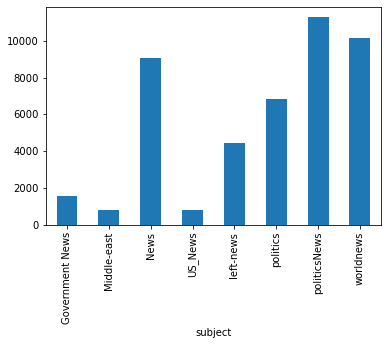

In [18]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
0    23481
1    21417
Name: text, dtype: int64


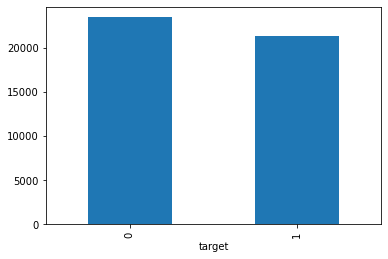

In [19]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

pip install wordcloud

In [20]:
from wordcloud import WordCloud

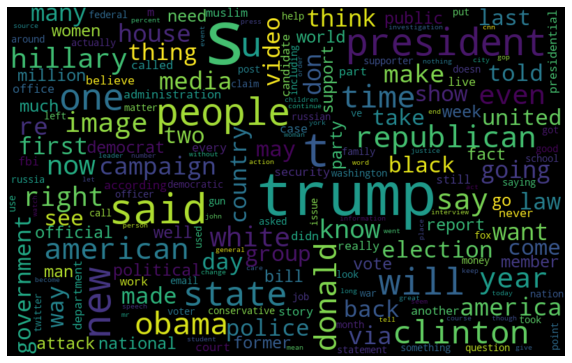

In [21]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == 0]#"fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

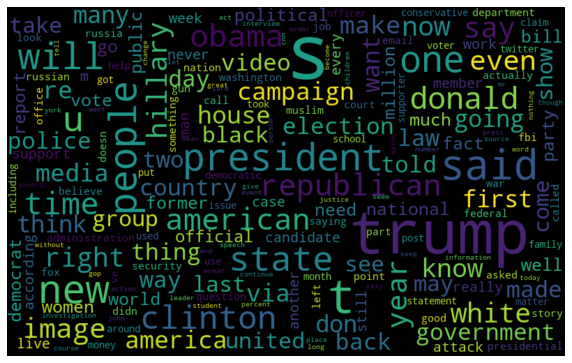

In [22]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == 1]#"true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize, FreqDist

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

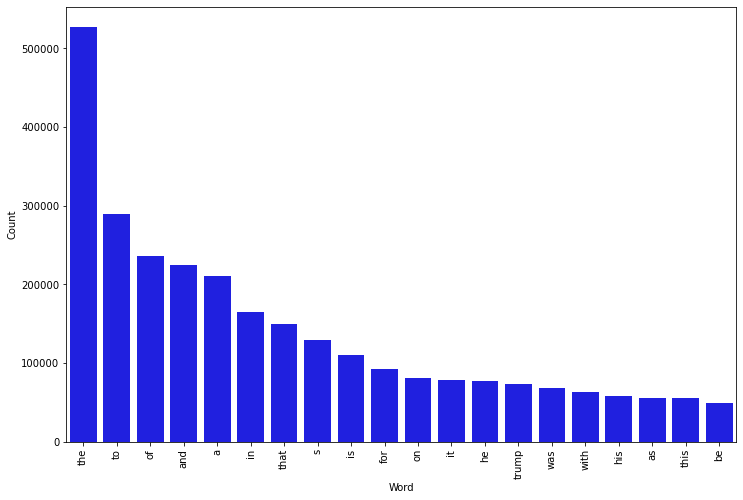

In [24]:
# Most frequent words in fake news
# counter(data[data["target"] == "fake"], "text", 20)
counter(data[data["target"] == 0], "text", 20)

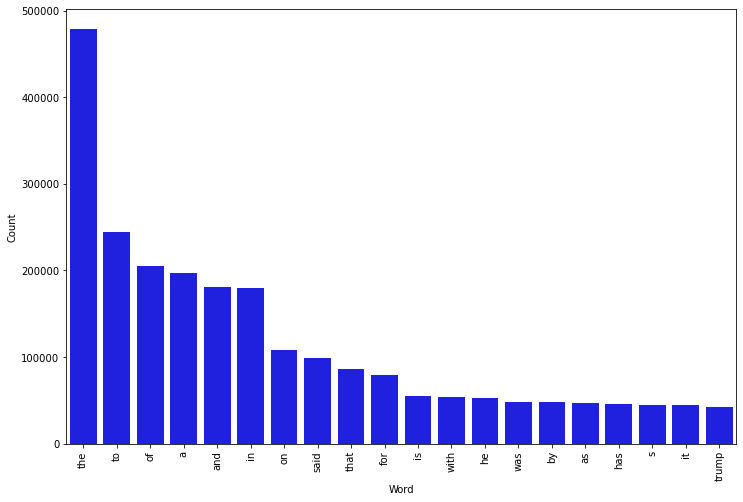

In [25]:
# Most frequent words in real news
# counter(data[data["target"] == "true"], "text", 20)
counter(data[data["target"] == 1], "text", 20)

## Modeling

In [26]:
from sklearn import metrics
import itertools

In [27]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Peparing the data

In [28]:
X = data['text']
y = data.target

In [29]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic regression

In [30]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.73%


Confusion matrix, without normalization


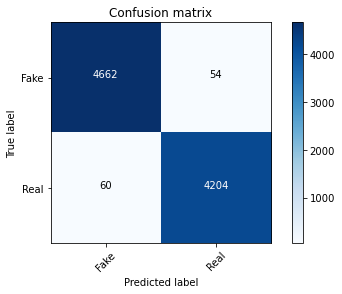

In [31]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

### Random Forest Classifier

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
from sklearn.ensemble import RandomForestClassifier

cv = CountVectorizer()
X_train_new = cv.fit_transform(X_train)
X_test_new = cv.transform(X_test)

model = RandomForestClassifier(n_estimators=50, criterion="entropy")
model.fit(X_train_new, y_train)
prediction = model.predict(X_test_new)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
cross_val_score(model, X_test_new, y_test, cv=10).mean()

accuracy: 98.63%


0.9657015590200446

Confusion matrix, without normalization


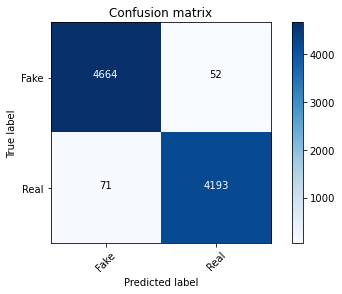

In [34]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [35]:
from sklearn.model_selection import GridSearchCV

In [39]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 10),
                                'min_samples_split': range(10, 60, 10),
                                'criterion': ['gini', 'entropy']},
                                cv=3,
                                 n_jobs=1,
                                scoring='neg_mean_squared_error')

gs.fit(X_train_new, y_train)

print(gs.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 30}


### Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

cv = CountVectorizer()
X_train_new = cv.fit_transform(X_train)
X_test_new = cv.transform(X_test)

model = DecisionTreeClassifier(criterion= 'gini', max_depth = 9, min_samples_split=20, splitter='best', random_state=42)
model.fit(X_train_new, y_train)
prediction = model.predict(X_test_new)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("Cross Validation Score: ", cross_val_score(model, X_test_new, y_test, cv=10).mean())

accuracy: 99.44%
Cross Validation Score:  0.9943207126948777


# Hyperparameter Tuning

In [41]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

Confusion matrix, without normalization


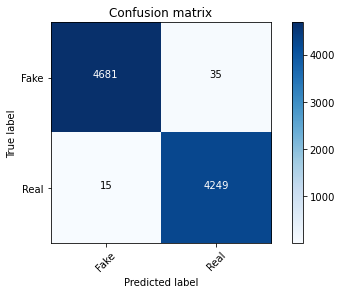

In [43]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [44]:
import joblib

In [45]:
joblib.dump(model, 'model.pkl')

['model.pkl']

In [46]:
joblib.dump(cv, 'cv.pkl')

['cv.pkl']